<a href="https://colab.research.google.com/github/MarigoldJ/ygl2/blob/main/class/20210609_nlp_1%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re

# 자연어 노이즈 제거 실습

## 노이즈 유형 (1) 문장부호


In [ ]:
def pad_punctuation(sentence, punc):
    for p in punc:
        sentence = sentence.replace(p, f' {p} ')
    
    return sentence

sentence = "Hi, my name is john."

print(pad_punctuation(sentence, ['.', '?', '!', ',']))

Hi ,  my name is john . 


## 노이즈 유형 (2) 대소문자

In [ ]:
sentence = 'First, open the first chapter.'
print(sentence.lower())
print(sentence.upper())
print(sentence)

first, open the first chapter.
FIRST, OPEN THE FIRST CHAPTER.
First, open the first chapter.


## 노이즈 유형 (3) 특수문자

In [ ]:
sentence = 'He is a ten-year-old boy.'
sentence = re.sub('([^a-zA-Z.,?!])', ' ', sentence)

print(sentence)

He is a ten year old boy.


## 종합하기

* 노이즈 유형 1, 2, 3 다 사용해서 정제하기
* [텍스트 예제 링크](https://www.gutenberg.org/files/2397/2397-h/2397-h.htm)

In [ ]:
def cleaning_text(text, punc, regex):
    
    sentence = pad_punctuation(text, punc)
    sentence = sentence.lower()
    sentence = re.sub(regex, ' ', sentence)

    return sentence

corpus = input()

corpus2 = """
Afterward, at my eager request, Mr. Anagnos had this story embossed, and I read it again and again, until I almost knew it by heart; and all through my childhood "Little Lord Fauntleroy" was my sweet and gentle companion. I have given these details at the risk of being tedious, because they are in such vivid contrast with my vague, mutable and confused memories of earlier reading.

From "Little Lord Fauntleroy" I date the beginning of my true interest in books. During the next two years I read many books at my home and on my visits to Boston. I cannot remember what they all were, or in what order I read them; but I know that among them were "Greek Heroes," La Fontaine's "Fables," Hawthorne's "Wonder Book," "Bible Stories," Lamb's "Tales from Shakespeare," "A Child's History of England" by Dickens, "The Arabian Nights," "The Swiss Family Robinson," "The Pilgrim's Progress," "Robinson Crusoe," "Little Women," and "Heidi," a beautiful little story which I afterward read in German. I read them in the intervals between study and play with an ever-deepening sense of pleasure. I did not study nor analyze them—I did not know whether they were well written or not; I never thought about style or authorship. They laid their treasures at my feet, and I accepted them as we accept the sunshine and the love of our friends. I loved "Little Women" because it gave me a sense of kinship with girls and boys who could see and hear. Circumscribed as my life was in so many ways, I had to look between the covers of books for news of the world that lay outside my own.

I did not care especially for "The Pilgrim's Progress," which I think I did not finish, or for the "Fables." I read La Fontaine's "Fables" first in an English translation, and enjoyed them only after a half-hearted fashion. Later I read the book again in French, and I found that, in spite of the vivid word-pictures, and the wonderful mastery of language, I liked it no better. I do not know why it is, but stories in which animals are made to talk and act like human beings have never appealed to me very strongly. The ludicrous caricatures of the animals occupy my mind to the exclusion of the moral.
"""


print(cleaning_text(corpus, ['.', ',', '!', '?'], '([^a-zA-Z0-9.,?!\n])'))

print(cleaning_text(corpus2, ['.', ',', '!', '?'], '([^a-zA-Z0-9.,?!\n])'))


a
a

afterward ,  at my eager request ,  mr .  anagnos had this story embossed ,  and i read it again and again ,  until i almost knew it by heart  and all through my childhood  little lord fauntleroy  was my sweet and gentle companion .  i have given these details at the risk of being tedious ,  because they are in such vivid contrast with my vague ,  mutable and confused memories of earlier reading . 

from  little lord fauntleroy  i date the beginning of my true interest in books .  during the next two years i read many books at my home and on my visits to boston .  i cannot remember what they all were ,  or in what order i read them  but i know that among them were  greek heroes ,   la fontaine s  fables ,   hawthorne s  wonder book ,    bible stories ,   lamb s  tales from shakespeare ,    a child s history of england  by dickens ,   the arabian nights ,    the swiss family robinson ,    the pilgrim s progress ,    robinson crusoe ,    little women ,   and  heidi ,   a beautiful l

# Mecab활용 토큰화

## Mecab 코랩에 설치하기
* [Mecab-ko-for-GoogleColba 깃허브](https://github.com/SOMJANG/Mecab-ko-for-Google-Colab)

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [ ]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [ ]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 450kB 35.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-06-09 06:26:02--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=yd02FOvSKUvLMtO7izUAVwbThFA%3D&Expires=1623221180&AWSAccessKeyId=AKIA6KOSE3BNJR

In [ ]:
# import
from konlpy.tag import Mecab

In [ ]:
# check
mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


## 실습시작!

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded.keys())

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving korean-english-park.train.ko to korean-english-park.train.ko
dict_keys(['korean-english-park.train.ko'])
User uploaded file "korean-english-park.train.ko" with length 13730884 bytes


In [ ]:
ls

images/                                    korean-english-park.train.ko
install_mecab-ko_on_colab190912.sh         LICENSE
install_mecab-ko_on_colab_light_210108.sh  README.md


In [ ]:
path_to_file = './korean-english-park.train.ko'

In [ ]:
with open(path_to_file, 'r', encoding='utf-8') as f:
    raw = f.read().splitlines()

print('Data Size', len(raw))
print('Example:')
for sen in raw[0:100][::20]:
    print('>>', sen)

Data Size 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균균 길이: 60


Text(0.5, 1.0, 'Sentence Length Distribution')

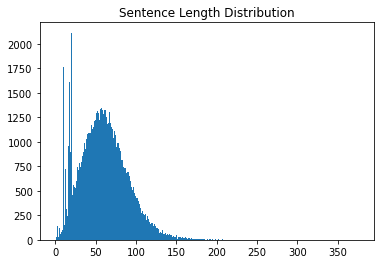

In [ ]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print('문장의 최단 길이:', min_len)
print('문장의 최장 길이:', max_len)
print('문장의 평균균 길이:', sum_len//len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")

In [ ]:
def check_sentence_with_length(raw, length):
    count = 0
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return 

check_sentence_with_length(raw, 1)

’


In [ ]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장의 길이를 추출합니다.
    # --> 문장의 길이가 1500을 넘는 문장의 인덱스를 추출하는거 같다.
    if _sum > 1500:
        print('Outlier index:', idx+1)

Outlier index: 11
Outlier index: 19
Outlier index: 21


In [ ]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

* 중복되는 문장을 set을 활용해 제거

In [ ]:
min_len = 999
max_len = 0
sum_len = 0

# 중복 문장 제거
cleaned_corpus = list(set(raw))
print('Data Size:', len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print('문장의 최단 길이:', min_len)
print('문장의 최장 길이:', max_len)
print('문장의 평균균 길이:', sum_len//len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균균 길이: 64


In [ ]:
check_sentence_with_length(cleaned_corpus, 11)

(아직 읽고있습니까?
외교통상부 이슬람교도
이력서와 자기 소개서
제발 답변을 주세요!
남한의 객관적 평가?
그들은 신중했습니다.
산 위를 나는 느낌.
그는 "잘 모르겠다.
경유 1200원대로…
처음에는 장난이었다.
hearing 청문회
스피어스가 뚱뚱한가?
그녀의 아름다운 눈.
크라이슬러. 조업중단
이전 보기 다음 보기
대답은 다음과 같다.
원화 강세 언제까지?
의자는 비어 있었다.
아기가 숨을 멈출 때
meantime 한편
"사과할 것이 없다.
끌어내다, 철수시키다
정권을 잡다[장악하다
levee 제방, 둑
케냐 야생동물 고아원
고 소식통이 전했다.
작은 못이 아닙니다.
원문기사 원문기사보기
좀 더 말씀해주시죠.
는 돌발질문을 했다.
라고 조던이 말했다.
시대가 변하고 있다.
키스를 잘 하는 방법
로그인 Korea사전
pledge 서약하다
standard 표준
조금은 새침한 샬롯？
- 네, 보이는군요.
폭탄테러가 공포 유발
우리는 운이 좋았다.
큰 파티는 아니지요.
- 모르고 있습니다.
9. 몇 분간의 명상
raft 다수, 다량
미래 동맹 정책 구상
Congress 의회
지하철 타기 겁난다.
디즈니사만이 아니다.
하와이, 빅 아일랜드
미래의 최첨단 사무실
세 시간쯤 걸었을까?
이 일은 계속됩니다.
전유를 넣은 카페라떼
대통령 후보자의 지명
비관적인, 염세주의의
를 외치며 기뻐했다.
tribunal 법정
resign 사퇴하다
brisk 활기를 띤
본서, 본부, 사령부
나는 크게 실망했다.
그 이유는 간단하다.
(정당의) 원내 총무
건물 전체 무너져내려
천재 소녀의 '부활'
더 내려야 하는 이유
사업의) 합병, 합동


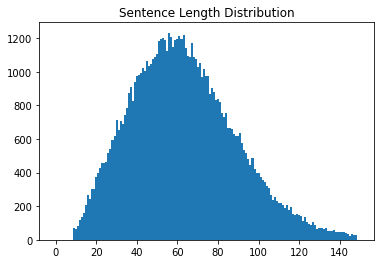

In [ ]:
max_len = 150
min_len = 10

filtered_corpus = [s for s in cleaned_corpus if (min_len <= len(s) < max_len)]

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title('Sentence Length Distribution')
plt.show()

## 공백 기반 토큰화

In [ ]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)
    tesor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [ ]:
# tagging을 뒤에 붙이려고 함.
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해주세요.

split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [ ]:
split_tensor, split_tokenizer = tokenize(split_corpus)
print('Split Vocab Size:', len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [ ]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ':', word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


In [ ]:
## 밝 + 혔다 // 밝 + 히다 , 밝 + 다

## 형태소 기반의 토큰화

In [ ]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어 보세요.
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [ ]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print('MeCab Vocab Size:', len(mecab_tokenizer.index_word))

# mecab_tensor : 문장에서 tokenizer(단어사전)에 따라 대응되는 숫자를 나열한 것
# mecab_tokenizer : 단어사전, 특정 단어와 숫자를 매칭시킴.

MeCab Vocab Size: 52279


## 원문으로 되돌려보기

* 두 가지 방법으로 mecab_tensor[100]을 원문으로 되돌려 보기!(띄어쓰기 고려 X)
    * 1. tokenizer.sequences_to_texts()함수를 사용하여 decoding
    * 2. tokenizer.index_word를 사용하여 decoding

In [ ]:
# Case 1 : tokenizer.sequences_to_texts()

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
texts


['당시 모터쇼 는 전기 차량 과 하이브리드 차량 들 이 대부분 차지 하 는 친환경 마을 이 었 다 . 나무 를 베 지 않 고 얻 을 수 있 는 유일 한 목재 인 콜크 로 제작 된 대시보드 를 장착 한 차량 들 도 있 었 다 .']

In [ ]:
# Case 2 : tokenizer.index_word

sentence = ' '

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + ' '

sentence



' 당시 모터쇼 는 전기 차량 과 하이브리드 차량 들 이 대부분 차지 하 는 친환경 마을 이 었 다 . 나무 를 베 지 않 고 얻 을 수 있 는 유일 한 목재 인 콜크 로 제작 된 대시보드 를 장착 한 차량 들 도 있 었 다 . '

In [ ]:
mecab_tensor[0]

[1535,
 3595,
 14411,
 4,
 182,
 83,
 7505,
 15911,
 2886,
 28,
 2540,
 457,
 484,
 15912,
 4302,
 107,
 431,
 13224,
 27,
 86,
 33,
 182,
 83,
 32433,
 28,
 2540,
 457]

In [ ]:
mecab_tokenizer.index_word[943]

'평가'